### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
%tensorflow_version 1.x 
import tensorflow as tf
tf.random.set_random_seed(42)

In [2]:
tf.__version__

'1.15.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. There are 7000 images per class.

In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
trainX.shape

(60000, 28, 28)

In [7]:
trainY.shape

(60000,)

In [8]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

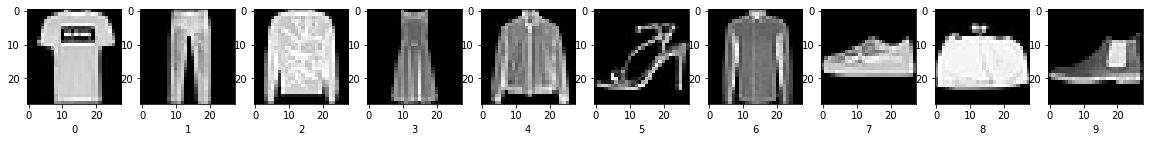

In [9]:
import matplotlib.pyplot as plt
#Trying to understand the data with one picture sample of every class
i = 0
counter = 0
plt.figure(figsize = (20,10))
while i < 10:
    if trainY[counter]==i:
        plt.subplot(1, 10, i+1)
        gray = trainX[counter]
        plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
        i = i + 1
        plt.xlabel(trainY[counter])
    counter = counter + 1
plt.show()


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
#One-hot encode the class vector
#convert class vectors (integers) to binary class matrix
#convert trainY and testY
#number of classes: 10
#we are doing this to use categorical_crossentropy as loss

In [0]:
trainY_Original = trainY.copy()
testY_Original = trainY.copy()

trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [12]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


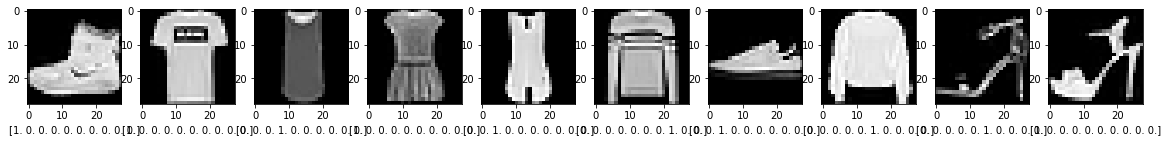

In [13]:
import matplotlib.pyplot as plt
#Trying to understand the data with one picture sample
i = 0
plt.figure(figsize = (20,10))
while i < 10:
    plt.subplot(1, 10, i+1)
    gray = trainX[i]
    plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
    i = i + 1
    plt.xlabel(trainY[i])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [14]:
# Initialize Sequential model
model1 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [16]:
model1.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 45us/sample - loss: 2035.2729 - acc: 0.7408 - val_loss: 2361.2088 - val_acc: 0.7364
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 1624.8751 - acc: 0.7772 - val_loss: 1044.3661 - val_acc: 0.8050
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 1528.7147 - acc: 0.7853 - val_loss: 3679.7120 - val_acc: 0.6896
Epoch 4/5
60000/60000 [==============================] - 2s 40us/sample - loss: 1508.5099 - acc: 0.7914 - val_loss: 4134.0442 - val_acc: 0.6844
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 1489.0156 - acc: 0.7933 - val_loss: 1118.4197 - val_acc: 0.8121


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())


# Add Dense Layer which provides 10 Outputs after applying softmax
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [19]:
model2.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6018 - acc: 0.7936 - val_loss: 0.5181 - val_acc: 0.8205
Epoch 2/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4906 - acc: 0.8302 - val_loss: 0.5045 - val_acc: 0.8255
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4671 - acc: 0.8392 - val_loss: 0.4773 - val_acc: 0.8343
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4553 - acc: 0.8412 - val_loss: 0.4874 - val_acc: 0.8350
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4476 - acc: 0.8446 - val_loss: 0.4730 - val_acc: 0.8395


In [20]:
out = model2.predict_classes(testX)

test_loss, test_acc = model2.evaluate(testX, testY)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.4730 - acc: 0.8395
Test accuracy: 0.8395


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# Comile the model
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model2.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4349 - acc: 0.8496 - val_loss: 0.4624 - val_acc: 0.8401
Epoch 2/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4338 - acc: 0.8500 - val_loss: 0.4706 - val_acc: 0.8417
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4329 - acc: 0.8501 - val_loss: 0.4673 - val_acc: 0.8402
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4304 - acc: 0.8515 - val_loss: 0.4686 - val_acc: 0.8385
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4297 - acc: 0.8514 - val_loss: 0.4664 - val_acc: 0.8381


In [23]:
out = model2.predict_classes(testX)

test_loss, test_acc = model2.evaluate(testX, testY)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.4664 - acc: 0.8381
Test accuracy: 0.8381


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model3 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())


#Add 1st hidden layer
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd hidden layer
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

# Add Dense Layer which provides 10 Outputs after applying softmax
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model3.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



In [25]:
model3.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 84us/sample - loss: 1.0251 - acc: 0.6924 - val_loss: 0.6283 - val_acc: 0.7780
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5689 - acc: 0.7993 - val_loss: 0.5104 - val_acc: 0.8166
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4911 - acc: 0.8248 - val_loss: 0.4633 - val_acc: 0.8320
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4532 - acc: 0.8377 - val_loss: 0.4435 - val_acc: 0.8379
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4314 - acc: 0.8456 - val_loss: 0.4308 - val_acc: 0.8420


In [26]:
out = model3.predict_classes(testX)

test_loss, test_acc = model3.evaluate(testX, testY)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.4308 - acc: 0.8420
Test accuracy: 0.842


## Review model

In [27]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [29]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [31]:
out1 = model1.predict_classes(testX)

test_loss, test_acc = model1.evaluate(testX, testY)
print('Test accuracy model 1:', test_acc)

out2 = model2.predict_classes(testX)

test_loss, test_acc = model2.evaluate(testX, testY)
print('Test accuracy model 2:', test_acc)

out3 = model3.predict_classes(testX)

test_loss, test_acc = model3.evaluate(testX, testY)
print('Test accuracy model 3:', test_acc)

10000/10000 [==============================] - 0s 22us/sample - loss: 1118.4197 - acc: 0.8121
Test accuracy model 1: 0.8121
10000/10000 [==============================] - 0s 36us/sample - loss: 0.4664 - acc: 0.8381
Test accuracy model 2: 0.8381
10000/10000 [==============================] - 0s 39us/sample - loss: 0.4308 - acc: 0.8420
Test accuracy model 3: 0.842


Introducing additional the dense layer and having learning rate as 0.03, is increasing the accuracy. Increaing the epochs will further increase the accuracy.